In [1]:
# This line loads into iPython the libraries needed to generate 
# graphics in-line
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Using python packages
Python code is organized in units called "packages". The central repository of public packages
is [pypi](https://pypi.python.org/)

Using a python library requires two steps:

1. Installing the packages (and their dependencies)
2. Importing the packages into the program

## installing packages
We use two package managers: pip and conda. Here we demonstrate the use pip. Conda is similar.

In [2]:
#get help on the pip command
!pip -h


Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  search                      Search PyPI for packages.
  wheel                       Build wheels from your requirements.
  help                        Show help for commands.

General Options:
  -h, --help                  Show help.
  --isolated                  Run pip in an isolated mode, ignoring
                              environment variables and user configuration.
  -v, --verbose               Give more output. Option is additive, and can be
                              used up to 3 times.
  -V, --version               Show version and exit.
  -q, --quiet                 Give less output.
  --log <path>                Path t

In [3]:
# List the installed packages
!pip list

appnope (0.1.0)
backports.ssl-match-hostname (3.4.0.2)
certifi (2015.9.6.2)
decorator (4.0.2)
funcsigs (0.4)
functools32 (3.2.3.post2)
gnureadline (6.3.3)
ipykernel (4.0.3)
ipython (4.0.0)
ipython-genutils (0.1.0)
ipywidgets (4.0.2)
Jinja2 (2.8)
jsonschema (2.5.1)
jupyter (1.0.0)
jupyter-client (4.0.0)
jupyter-console (4.0.2)
jupyter-core (4.0.4)
MarkupSafe (0.23)
matplotlib (1.4.3)
mistune (0.7.1)
mock (1.3.0)
nbconvert (4.0.0)
nbformat (4.0.0)
nose (1.3.7)
notebook (4.0.4)
numpy (1.9.2)
pandas (0.16.2)
path.py (8.1.1)
pbr (1.8.0)
pexpect (3.3)
pickleshare (0.5)
pip (7.1.2)
ptyprocess (0.5)
Pygments (2.0.2)
pyparsing (2.0.3)
python-dateutil (2.4.2)
pytz (2015.4)
pyzmq (14.7.0)
qtconsole (4.0.1)
scikit-learn (0.16.1)
scipy (0.16.0)
setuptools (18.3.1)
simplegeneric (0.8.1)
six (1.9.0)
terminado (0.5)
tornado (4.2.1)
traitlets (4.0.0)
vboxapi (1.0)
virtualenv (13.1.2)
wheel (0.24.0)


In [5]:
# Show information regarding a specific package
!pip show -v boto

In [ ]:
# Install a package
!pip install boto

In [ ]:
# upgrade the package
!pip install --upgrade boto

**Note:** You would usually run the installation in a shell, rather than in iPython. This is for various reasons, one of which is that you often need root permission to install a package, which means that you need to use the command `sudo` in front of pip. i.e.

  `sudo pip install --upgrade boto`

Doing so requires entering a password, which is hard to do inside a notebook, and is not recommended because it leaves
a trace of the password in an open file.

## Importing packages

In [6]:
import pylab

To get the documentation about a package, put `"?"` after it

In [7]:
pylab?

A package is a collection of objects (variables, classes, methods).

To get a list of the objects defined in pylab, type `tab` after the `"."`

In [8]:
pylab.

SyntaxError: invalid syntax (<ipython-input-8-99c9d24c421b>, line 1)

To get information about a particular method, put a question mark `"?"` after the full name of the method

In [ ]:
pylab.plot?

In [9]:
# to import pylab but use a shorter name
import pylab as pl

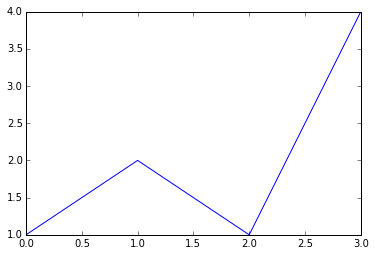

In [10]:
 pl.plot([1,2,1,4])

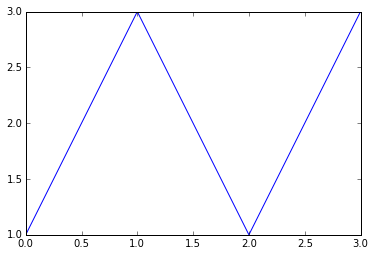

In [11]:
# you can also import specific object directly into the current namespace
from pylab import plot
plot([1,3,1,3])

In [ ]:
# you can even import all objects into the current name space, 
# but beware of name colissions!
from pylab import *

# Data Input and Output

In [ ]:
%cd ../data/ThinkStatsData/
!ls -F

In [ ]:
!cat survey.pl

In [ ]:
!cp survey.pl survey.tmp
#To read or write to a file we need a file handle
handle=open('survey.tmp','r+w')

In [ ]:
# 'r+w' means that the file is opened for both reading and writing. 
# For more information we check the documentation for "open"
open?

In [ ]:
# Which leads us to documentation for "file"
file?

In [ ]:
# read the file line by line and output the lines that contain the string 'class'

i=0        # counts the detected lines
for line in handle.readlines():
    if 'class' in line:
        print i,line,   # comma at the end because the line already contains <cr> at it's end.
        i+=1
handle.close()

In [ ]:
# read the file line by line and output the lines 
# that contain the string 'class'
# and store the location of the beginning of such lines
handle=open('survey.tmp','r+w')

table=[]   # the locations of the start of the detected lines in the file
i=0        # counts the detected lines
c=0        # counts all the lines
line='start'
while line != '':
    loc=handle.tell()
    line=handle.readline()
    if 'class' in line:
        print i,line,   # comma at the end because the line already contains <cr> at it's end.
        table.append((i,loc))
        i=i+1
handle.close()
print table

In [ ]:
#we can jump from place to place in the file
from string import strip
handle=open('survey.tmp','r+w')
for (i,loc) in table:
    handle.seek(loc)
    line=handle.readline()
    print i,line,

    #alter the line and write it back in.
    line=line[:7]+'***'+line[10:]
    handle.seek(loc)
    handle.write(line)

handle.close()

### Random access vs. sequential access
One can access file contents randomly, but there is a large penalty in terms of latency and latency variability.
We will look into this later today.

# File formats
The files we dealt with so far are plain text files. This is the format that is most portable, because you can always open
a text file in a text editor or look at some lines using `head` or `tail`

However, there are some important down sides to using text files:

1. **Space inefficiency:** the number 12345678901234567890 requires 20 bytes of disk space to store in ascii, but only  8 bytes to store in binary format. Moreover, structured data such as digitized sound can be compressed by large factors with negligible error.
1. **Self description vs. external description:** When we store data using ascii, we need to write two programs - an encoding program and a decoding program. This is a lot of additional work. By using **self-describing** data structures we can avoid this work altogether.

In [ ]:
#the calculation of the number of bytes required 
from math import log
(log(12345678901234567890)/log(2))/8

## Binary file formats
Binary files are written using the command `write` and read using the command `read`. Binary files lack the concept of **lines**, they only have positions. 

In [ ]:
file=open('binaryFile','wb')
buffer=bytearray(range(100,200))
file.write(buffer)
file.close()

In [ ]:
# printing the content of a binary file as text does not make much sense
!head binaryFile

In [ ]:
file=open('binaryFile','rb')
buffer2=bytearray(file.read())
type(buffer2)
S=','.join([str(i) for i in buffer2])
print S
print 'length as csv',len(S)
file.close()
print 'length of binary file=100 byte'
!ls -l binaryFile

## Self describing files
We will cover two types of self-describing files:

* The first are `pickle` files. This format is popular within the python environment and can store any python data structure. The encoded file is typically readable, but that is not the main feature.  
* The second are `json`. This format came out of `javascript` and is used extensively over the web as a way to communicate complex data structure. It is a format that emphasizes readability and interoperability. It is now the de-facto standard for internet communication between programs.

In [ ]:
# Lets define a complex data structure
A={'first name':'Yoav',
   'last name':'Freund',
   'speaks':('English','Hebrew'),
   'Research':{'Probability':7,
               'bio-informatics':3,
               'Data Science':2.1
               },
   'longList':numpy.zeros(10000)
   }
A

In [ ]:
# Lets store this data in a Pickle file
import pickle
pickle.dump(A,open('pickle.pkl','wb'))
!ls -l pickle*

### There are currently 3 different protocols which can be used for pickling.

* Protocol version 0 is the original ASCII protocol and is backwards compatible with earlier versions of Python.
* Protocol version 1 is the old binary format which is also compatible with earlier versions of Python.
* Protocol version 2 was introduced in Python 2.3. It provides much more efficient pickling of new-style classes.


In [ ]:
pickle.dump(A,open('pickle0.pkl','wb'),0)
pickle.dump(A,open('pickle1.pkl','wb'),1)
pickle.dump(A,open('pickle2.pkl','wb'),2)
!ls -l pickle*

In [ ]:
# only protocol 0 uses ascii, 1,2 generate smaller files
!cat pickle.pkl

## Pickling and compressing
One useful combination is to use gzip to compress the pickled file. This way you get both the self description and the space reduction benefits. The main thing you lose is the readability of the stored file.

In [ ]:
import gzip
pickle.dump(A,gzip.open('picklez0.pkl','wb'),0)
pickle.dump(A,gzip.open('picklez1.pkl','wb'),1)
pickle.dump(A,gzip.open('picklez2.pkl','wb'),2)

In [ ]:
#loading the file back
B=pickle.load(gzip.open('picklez2.pkl','rb'))
B

In [ ]:
ls -l pickl*

## JSON
Using JSON is very similar to pickle, the results are more readable, but json cannot encode arbitrary python data types.

In [ ]:
import json
A['longList']='shortList'  # json cannot deal with numpy arrays
json.dump(A,open('json.jsn','wb'))
pickle.dump(A,open('json.pkl','wb'))

In [ ]:
!cat json.jsn

In [ ]:
#json is almost identical to the string generated by "print"
print A

In [ ]:
B=json.load(open('json.jsn','rb'))
B

In [ ]:
!ls -l json* pick*

## Formatted printing
Sometimes we want to print variables in a nicely formatted way. For this we use the command "format-string'%(list of variables)

In [ ]:
A=[ (i,i*i) for i in range(10)]
B=['even' if i%2==0 else 'odd' for i in range(10)]
print A,B

In [ ]:
# To print this nicely, one line per number, we can use the following 
for i in range(10):
    print "%1d is %5s, and its square is %d"%(A[i][0],B[i],A[i][1])
#the %5s element pads the string to be of length 5, which guarantees that the columns will be aligned

For more information about formatting, see this page: https://docs.python.org/2/library/stdtypes.html#string-formatting